In [1]:
# this script replicates the experiment of multi-university research team work

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
pubs_path="../../data/nf_folder/Data/DerivedData/CleanedRawData/pubs_author_funder.csv"

In [3]:
paf = pd.read_csv(pubs_path)
paf['author_country'] = paf['author_country'].apply(literal_eval)
paf['funder_country'] = paf['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else "Not-Funded")
paf.head()

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3


In [4]:
paf['authors']=paf['author_country'].apply(lambda x: list(set(x)))
paf['funders']=paf['funder_country'].apply(lambda x: list(set(x)) if x!='Not-Funded' else x)

In [5]:
paf=paf[['id','authors','funders','discipline','year','rel_citation','citation']]

In [6]:
paf['num_fd']=paf['funders'].apply(lambda x: len(x) if x!='Not-Funded' else 0)
paf.head()

,id,authors,funders,discipline,year,rel_citation,citation,num_fd
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,1
1,30574690,"[United States, France]",[United States],83,2009,0.703,9,1
2,30574691,[Russia],[Russia],83,2009,0.312,4,1
3,30585095,[Spain],[Spain],89,2009,0.137,1,1
4,30585097,"[Spain, Germany]",[Spain],89,2009,0.410,3,1


In [8]:
paf.head()

,id,authors,funders,discipline,year,rel_citation,citation,num_fd
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,1
1,30574690,"[France, United States]",[United States],83,2009,0.703,9,1
2,30574691,[Russia],[Russia],83,2009,0.312,4,1
3,30585095,[Spain],[Spain],89,2009,0.137,1,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,1


In [7]:
paf['num_fd']=paf['num_fd'].apply(lambda x: 2 if x>2 else x)

In [20]:
paf['col']=paf['authors'].apply(lambda x:1 if len(x)>1 else 0)

In [8]:
fdcnt = paf.groupby(['year','num_fd']).size().reset_index(name='count')
fdcnt = fdcnt.pivot(index='year',columns='num_fd',values='count')
fdcnt = fdcnt.div(fdcnt.sum(axis=1), axis=0)
fdcnt.columns=['nofund','single','cofund']
fdcnt = fdcnt.reset_index().melt(id_vars='year',var_name='type', value_name='value')
fdcnt.head()

,year,type,value
0,2009,nofund,0.522596
1,2010,nofund,0.450627
2,2011,nofund,0.412973
3,2012,nofund,0.400387
4,2013,nofund,0.388534


<AxesSubplot:xlabel='year', ylabel='value'>

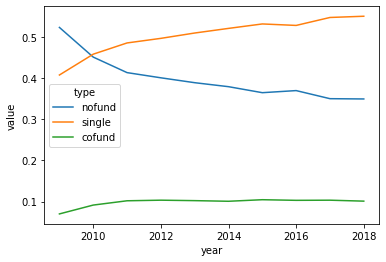

In [22]:
sns.lineplot(x='year',y='value',hue='type',data=fdcnt)

In [52]:
colfdcnt = paf.groupby(['year','col','num_fd']).size().reset_index(name='count')
colfdcnt.head(2)

,year,col,num_fd,count
0,2009,0,0,452848
1,2009,0,1,344145


In [53]:
colfdcnt = colfdcnt.pivot(index=['year','col'],columns='num_fd',values='count')
colfdcnt = colfdcnt.div(colfdcnt.sum(axis=1), axis=0)

In [54]:
colfdcnt.columns=['nofund','single','cofund']
colfdcnt = colfdcnt.reset_index()
colfdcnt = colfdcnt.melt(id_vars=['year','col'],var_name='type', value_name='value')

<AxesSubplot:xlabel='year', ylabel='value'>

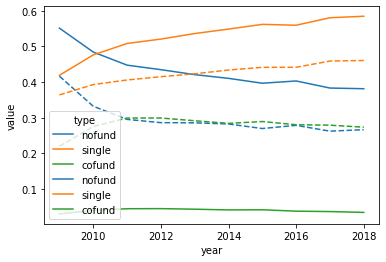

In [63]:
sns.lineplot(x='year',y='value',hue='type',data=colfdcnt[colfdcnt.col==0])
sns.lineplot(x='year',y='value',hue='type',data=colfdcnt[colfdcnt.col==1],linestyle="dashed")

In [9]:
code2name_path="../../data/nf_folder/Data/RawData/discipline_code.csv"
name2level_path="../../data/nf_folder/Data/AdditionalData/discipline_classification.csv"

In [16]:
code2name=pd.read_csv(code2name_path)
code2name.columns=['discipline','disname']
code2name.head(2)

,discipline,disname
0,1,Agricult & Food Science
1,2,Botany


In [17]:
name2level=pd.read_csv(name2level_path)
name2level = name2level[['level_1','level_3']]
name2level.columns=['disname','dislevel']
name2level.head(2)

,disname,dislevel
0,Fine Arts & Architecture,Arts and Humanities
1,Performing Arts,Arts and Humanities


In [23]:
dismeta=paf[['id','discipline','year','num_fd','col']]
dismeta.head(2)

,id,discipline,year,num_fd,col
0,30507292,77,2009,1,0
1,30574690,83,2009,1,1


In [24]:
dismeta=dismeta.merge(code2name,on='discipline')
dismeta=dismeta.merge(name2level,on='disname')
dismeta.head()

,id,discipline,year,num_fd,col,disname,dislevel
0,30507292,77,2009,1,0,Computers,Engineering
1,30703329,77,2009,1,1,Computers,Engineering
2,30742782,77,2009,1,0,Computers,Engineering
3,30742783,77,2009,1,0,Computers,Engineering
4,30742788,77,2009,1,0,Computers,Engineering


In [25]:
dismeta.num_fd.unique()

array([1, 2, 0])

In [40]:
discnt = dismeta.groupby(['year','dislevel','num_fd']).size().reset_index(name='count')

In [41]:
discnt = discnt.pivot_table(index=['year','dislevel'],columns='num_fd',values='count')
discnt.columns=['nofund','single','cofund']
discnt = discnt.div(discnt.sum(axis=1), axis=0)
discnt = discnt.reset_index()

In [45]:
discnt.head()

,year,dislevel,nofund,single,cofund
0,2009,Engineering,0.592919,0.367326,0.039755
1,2009,Medical Sciences,0.559627,0.371717,0.068656
2,2009,Natural Sciences,0.458516,0.458798,0.082685
3,2010,Engineering,0.517800,0.426620,0.055580
4,2010,Medical Sciences,0.489473,0.418738,0.091789


In [47]:
discnt = discnt.melt(id_vars=['year','dislevel'],var_name='type', value_name='value')
discnt.head()

,year,dislevel,type,value
0,2009,Engineering,nofund,0.592919
1,2009,Medical Sciences,nofund,0.559627
2,2009,Natural Sciences,nofund,0.458516
3,2010,Engineering,nofund,0.517800
4,2010,Medical Sciences,nofund,0.489473


<AxesSubplot:xlabel='year', ylabel='value'>

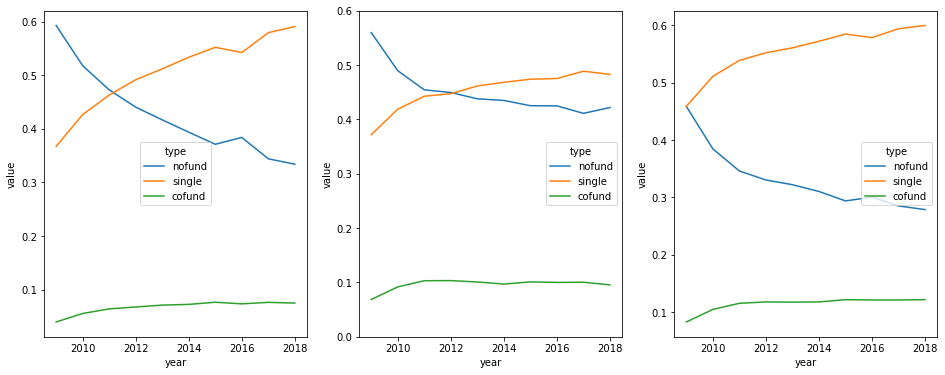

In [52]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
sns.lineplot(x='year',y='value',hue='type',data=discnt[discnt.dislevel=='Engineering'],ax=ax[0])
sns.lineplot(x='year',y='value',hue='type',data=discnt[discnt.dislevel=='Medical Sciences'],ax=ax[1])
ax[1].set_ylim(0,0.6)
sns.lineplot(x='year',y='value',hue='type',data=discnt[discnt.dislevel=='Natural Sciences'],ax=ax[2])

In [6]:
#calculate the distributon of size of funders

In [12]:
paf.tail()

,id,authors,funders,discipline,year,rel_citation,citation,num_fd
12759123,65301180,[Pakistan],Not-Funded,89,2018,0.000,0,0
12759124,65301286,[Singapore],Not-Funded,44,2017,0.264,1,0
12759125,65301288,[Iran],Not-Funded,96,2017,0.000,0,0
12759126,65301295,[Israel],Not-Funded,96,2017,0.000,0,0
12759127,65301297,[United Kingdom],Not-Funded,2,2018,1.992,2,0


In [15]:
cfcnt = paf.groupby('num_fd').size().reset_index(name='count')

In [18]:
cfcnt = cfcnt[cfcnt.num_fd>=2]

In [20]:
cfcnt['prop']=cfcnt['count']/cfcnt['count'].sum()

<ipython-input-20-c0e85b62683e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfcnt['prop']=cfcnt['count']/cfcnt['count'].sum()


In [22]:
cfcnt['count'].sum()

1264385

In [8]:
paf.head(10)

,id,authors,funders,discipline,year,rel_citation,citation,num_fd
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,1
1,30574690,"[France, United States]",[United States],83,2009,0.703,9,1
2,30574691,[Russia],[Russia],83,2009,0.312,4,1
3,30585095,[Spain],[Spain],89,2009,0.137,1,1
4,30585097,"[Spain, Germany]",[Spain],89,2009,0.410,3,1
5,30585101,[United States],[United States],89,2009,1.230,9,1
6,30585102,[United States],[United States],89,2009,0.137,1,1
7,30585103,"[Ireland, United Kingdom]",[Ireland],89,2009,0.957,7,1
8,30585104,[Japan],[Japan],89,2009,0.410,3,1
9,30585105,"[Canada, United States]",[Canada],89,2009,0.000,0,1


In [7]:
paf.head()

,id,authors,funders,discipline,year,rel_citation,citation,num_fd
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,1
1,30574690,"[France, United States]",[United States],83,2009,0.703,9,1
2,30574691,[Russia],[Russia],83,2009,0.312,4,1
3,30585095,[Spain],[Spain],89,2009,0.137,1,1
4,30585097,"[Spain, Germany]",[Spain],89,2009,0.410,3,1


In [13]:
athcnt = paf.explode('authors')

In [14]:
athcnt = athcnt.groupby('authors').size().reset_index(name='pubcnt')
athcnt = athcnt.sort_values(by='pubcnt',ascending=False)

In [15]:
athcnt['rank'] = np.arange(len(athcnt))
athcnt['rank_c'] = pd.cut(athcnt['rank'],bins=[0,20,100,206],labels=[3,2,1],include_lowest=True)

In [16]:
cntrydict = dict(zip(athcnt.authors,athcnt.rank_c))

In [17]:
res = []
for index, row in tqdm(paf.iterrows(),total=paf.shape[0]):
    year = row['year']
    funders=row['funders']
    fundorder = [cntrydict[x] for x in funders if x in cntrydict]
    if (len(fundorder)>1):
        for i, c in enumerate(funders):
            m = max(fundorder[:i]+fundorder[i+1:])
            res.append([c,year,m])

100%|██████████| 12759128/12759128 [11:12<00:00, 18959.14it/s]


In [22]:
res_df=pd.DataFrame(res,columns=['cntry','year','cofund'])
res_df.head(2)

,cntry,year,cofund
0,Spain,2009,3
1,Italy,2009,3


In [23]:
res_df=res_df.groupby(['cntry','cofund']).size().reset_index(name='count')

In [24]:
res_df = res_df.pivot_table(index='cntry',columns='cofund',values='count',fill_value=0)

In [25]:
#res_df=res_df.reset_index()
res_df['crank']=res_df['cntry']
res_df['crank']=res_df['crank'].apply(lambda x:cntryrank[x] if x in cntryrank else 4)

KeyError: 'cntry'

In [69]:
res_df.head()

,cntry,year,cofund,crank
0,Spain,2009,3,3
1,Italy,2009,3,3
2,EU,2009,3,4
3,Spain,2009,3,3
4,Brazil,2009,3,3


In [70]:
res_df.groupby(['crank','cofund']).size()

crank  cofund
1      1             156
       2             663
       3            4861
2      1             567
       2           64522
       3          399502
3      1            2770
       2          220867
       3         1823797
4      1             210
       2           18309
       3          101946
dtype: int64